# Introducción a los procesos gausianos

Esta sección tiene como objetivo mostrar la especificación general de un proceso gausiano. En ella analizaremos las diferentes partes que los componen así como la generación de distintas simulaciones de varios procesos gausianos (realizaciones). Dejaremos para la siguiente sección la implementación de métodos de inferencia y predicciones. 

## Especificación general

Los procesos gausianos son un tipo de proceso estocástico continuo generado por una distribución normal multivariada. Este tipo de procesos son ampliamente utilizados en aplicaciones donde las observaciones (o mediciones) varían a lo largo de un dominio contínuo, como podrían ser series de tiempo o fenómenos espaciales. 

Siguiendo la definición de \cite{Diggle1998}, un proceso gausiano $\{S(x): x \in \mathbb{R}^k\}$ es un proceso estocástico con la propiedad de que, para cualquier colección de puntos $x_1, x_2, ..., x_n$ donde $x_i \in \mathbb{R}^k$, la distribución conjunta de S = $\{S(x_1),...,S(x_n)\}$ es una distribución gausiana multivariada.

Recordando que, para un vector $S$, un vector de media $\mu_S$ y una una matrix de varianza-covarianza $\Sigma$ (i.e. simétrica y positiva definida), la distribución de una variable normal multivariada tiene la forma:

$$ [S ; \mu,\Sigma] = 2 \pi ^{-\frac{n}{2}} \text{det}(\Sigma)^{-\frac{1}{2}}e^{-\frac{1}{2}(S - \mu)^T \Sigma^{-1}(S-\mu)}$$
 
Dada una colección finita de puntos (e.g. en el tiempo, o el espacio) $x_1, ...., x_n$, podemos definir a $\mu_S \in \mathbb{R}^n$  como el vector compuesto por elementos $\mu(x_i)$, donde $\mu(x_i)$ es una función escalar (i.e. $\mathbb{R}^{k} \rightarrow \mathbb{R})$. 
Esta función $\mu(x)$ recibe el nombre de función de media, pues $E[S] = \mu_S$.  De manera análoga, $\Sigma$ puede ser definida como la matriz de $n \times n$ cuyas entradas $\Sigma_{i,j}$,
está dada por una función de covarianza $\gamma(x_i,x_j): \mathbb{R}^{k} \times \mathbb{R}^{k} \rightarrow \mathbb{R}^{+}$. 
Para que la función $\gamma(.)$ sea una función de covarianza, la matriz inducida debe ser estrictamente positiva definida. Esto es, para todo vector $a_1,...,a_n$: 
$$ \sum_{i=1}^n \sum_{j=1}^n a_i a_j \gamma(x_i,x_j) > 0$$

alternativamente, se puede escribir en su forma matricial como: 

$$ a' \Sigma a > 0$$

De esta manera, vemos que todo proceso gausiano $S$ puede ser definido por una función de media y una función de covarianza.
Dado que existe una infinidad no numerable de ambos tipos de funciones, en la práctica sólo se utilizan ciertas familias de funciones. Esto con la finalidad de especificar modelos parsimoniosos que se puedan ajustar fácilmente a los datos observados (mediciones).



## Simulando un proceso Gausiano
Viendo que podemos separar el proceso $S$ en dos componentes (i.e. la función de covarianza y la función de media) podemos asumir, por el momento que una función de media constante igual a 0 (i.e.$E[S] = 0$). De esta manera, la distribución conjunta quedará definida como una normal multivariada centrada en el vector $0$. i.e.:

$$[S;\mu=0,\Sigma] =  \text{NMV}(0,\Sigma)$$

Recordando que $\Sigma$ está definida por la evaluación de la función de covarianza $\gamma(x_i,x_j)$ en la entrada $\Sigma_{i,j}$, podemos generar una matriz de covarianza $\Sigma$ para especificar una distribución normal multivariada, dado un conjunto de puntos y una función adecuada de covarianza. 

>> Justificación de estacionaridad e isotropía

### Estacionario e isotrópico

La función $\gamma(x,x')$ puede ser simplificada como $\gamma(x,x') = \gamma(|x,x'|)$ si añadimos la restricción de isotropía, es decir la función de covarianza será invariante para cualquier pareja de puntos que tengan la misma distancia sin importar el ángulo entre ellos o la localización (estacionaridad). 

> Definidir mejor la distancia en vez de valor absoluto

Comencemos con el caso unidimensional (i.e. $k=1$).
Imaginemos que el dominio a simular es el tiempo y que la correlación de los puntos en el tiempo.

Comenzemos con 10 puntos distribuidos uniformemente sobre el intervalo 0 a 1000.

In [294]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [329]:
#plt.style.use('seaborn-pastel')
#gv.extension('bokeh','matplotlib')
plt.rcParams['figure.figsize'] = [20,10]

In [296]:
n = 100
minx = 0
maxx = 100
puntos = np.linspace(minx,maxx,n)

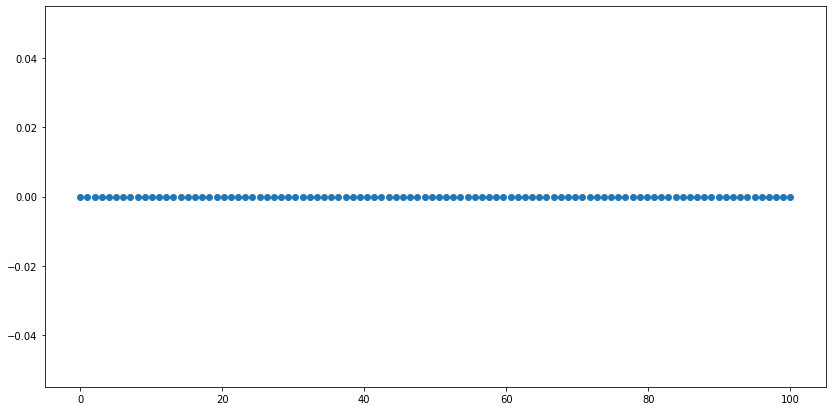

In [297]:
# Hacemos un vector constante, solo para graficar
cons = np.full((n,1),0)
plt.scatter(puntos,cons)

La gráfica muestra que no hay una tendencia entre los puntos o, dicho de forma más precisa, esta tendencia es la constante 0. Por ahora nos dedicaremos a simular la varianza y correlación entre los puntos.


La simplificación permite aplicar $\gamma()$ a las distancias entre los puntos. Para esto, entonces, necesitamos calcular las distancias entre los puntos. 

In [298]:
from scipy.spatial import distance
import itertools

Text(0.5, 1.0, 'Matriz de distancias')

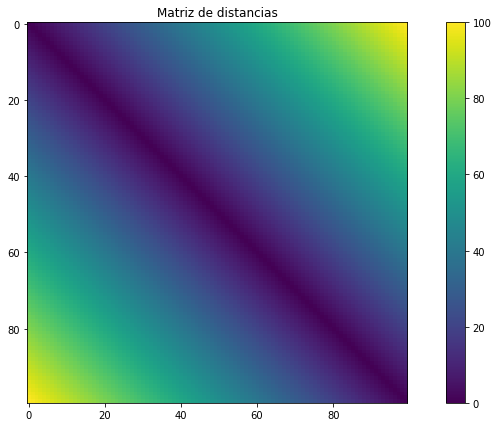

In [299]:
## Hacemos el producto cruz (conjuntista) entre los puntos.
M = np.array([x for x in itertools.product(puntos,puntos)])
## Sacamos distancias entre las parejas de puntos 
listaD = [ distance.minkowski(Mij[0],Mij[1]) for Mij in M]
## Convertimos la lista de distancias en un arreglo (matriz) de nxn.
D = np.array(listaD).reshape(n,n)
## Visualizamos 
plt.imshow(D)
plt.colorbar()
plt.title("Matriz de distancias")

Vemos que la matriz de distancias es simétrica.

## Funciones de correlación
Como vimos anteriormente, la función $\gamma(|x,x'|)$ define la correlación entre los puntos $x,x'$ y, además, una condición necesaria y suficiente para una función de covarianza es la de ser *positiva definida*. Es decir, si $\gamma$ aplicada a la matrix de distancia $D$ genera la matriz $M$, entonces, $M$ debe ser positiva definida (i.e. $ a' M a > 0$ para todo $a \in \mathbb{R}^n$ ). Dado que esta condición es dificil de satisfacer para cualquier tipo de función y cualquier conjunto de puntos, en la práctica se utilizan ciertas familias de funciones que garantizan la condición de /positividad definida/ para cualquier conjunto de puntos.

Una de las formas más comunes para modelar la estructura de correlación es a través de la distancia entre puntos, donde la correlación entre los puntos disminuye continua (y diferencialmente) en función de la distancia que los separa. Por lo general se utilizan distancias euclideanas aunque se pude generalizar para otro tipo de geometrías. 

Recordando entonces que una condición necesaria para modelar este tipo de procesos es que la función de correlación debe definir una matrix positiva defina, existen cierto tipo de funciones de correlación que definen estas estructuras en función de distancias.

De esta manera, éstas familias de funciones sirven como elementos básicos para construir una gran variedad de funciones de covarianza basadas en distancias. 

>> Describir la relación entre correlación  y covarianza 

Una de las más sencillas es la función de correlación exponencial.
### Función exponencial
Comenzaremos por una de las funciones más sencillas, la función exponencial, tambien llamada *función gausiana de correlación* o *función radial de base*. Esta función tiene la forma:
$$\rho(d) = \exp{\{-(\frac{d}{ 2 \phi})^2\}}$$
donde $\rho$ define la correlación y $d$ la distancia entre $|x,x'|$. El parámetro $\phi$ define la escala, o la distancia a la cual se llegará a la correlación 0.
La implementación de esta función en Python sería la siguiente:

In [300]:
def correlación_exponencial(d, phi=1.0):
    """
    Función que recibe distancia y devuelve la covarianza:
    $$\rho(d) = \exp{\{-(d/\phi)^2\}}$$
    """
    rho_d = np.exp(-(d / (2 * phi))**2)
    return(rho_d)

def covarianza_exponencial(d,phi=1.0,nugget=0.0,sigma_2=1.0):
    """
    Función de covarianza dada la distancia.
    """
    CorrM = correlación_exponencial(d,phi=phi)       
    CovM = (sigma_2) * CorrM
    nI = nugget * np.identity(n)
    return(CovM + nI)     



Recordando que D es la matrix de distancias, podemos tomar un renglón de D y evaluar la función exponencial para ver como se comporta a lo largo del rango 0, 100 (i.e. minx, maxx).
Podemos entonces graficar la correlación y la respectiva matriz de covarianza con el siguiente código.


Esta función se puede generalizar en:
## Correlación de potencia exponencial
Podemos generalizar la función de correlación exponencial por:
    $$ \rho(u) = \exp(-(u/\phi)^\kappa)$$
    
Donde: $0 < \kappa \leq 2$
Como se puede ver, esta función es equivalente a la función de correlación exponencial cuando $\kappa = 2$.
La implementación sería de la siguiente forma:

In [301]:
def correlación_de_potencia_exponencial(distancia,phi=0.5,kappa=0.5):
    """
    Función de correlación exponencial con potencia $\kappa$ de la forma:
    $$ \rho(u) = \exp(-(u/\phi)^\kappa)$$
    
    Donde: $0 \le \kappa \leq 2$
    """
    rho_u = np.exp(-((distancia/phi)**kappa))
    return(rho_u)

def covarianza_de_potencia_exponencial(d,phi=1.0,kappa=0.5,nugget=0.0,sigma_2=1.0):
    """
    Función de covarianza dada la distancia.
    """
    CorrM = correlación_de_potencia_exponencial(d,phi=phi,kappa=kappa).reshape(n,n)       
    CovM = (sigma_2) * CorrM
    nI = nugget * np.identity(n)
    return(CovM + nI)    

In [302]:
import scipy.stats as sts


def simulateGPpowexp1D(matriz_de_distancias,phi=10.0,kappa=0,sigma_2=1.0,nugget=0.0):
    """
    Simula un proceso Gaussiano de una dimensión. 
    #Sobrelapa la gráfica con una muestra aleatoria de variables normales iid.
    """
    np.random.seed(seed=233423)
    M = matriz_de_distancias
    CovM = covarianza_de_potencia_exponencial(M.flatten(),phi,kappa,nugget,sigma_2)
    ps = sts.multivariate_normal(cov=CovM).rvs()
    p0 = sts.norm(scale=1).rvs(n)
    #plt.plot(D[0,:],p0)
    #plt.plot(D[0,:],ps)
    return({'CovMat':CovM.reshape(M.shape),'simulacion': ps,'normal_iid':p0})


# Potencia Exponencial (interactivo)


In [303]:
## Funcion de covarianza
slider_phi = widgets.FloatSlider(
    value = 20,
    min = 0.0,
    max = 100,
    step=2,
    description='$\\phi$:',
    continuous_update=False,
)

slider_kappa = widgets.FloatSlider(
    value = 1.0,
    min = 0,
    max = 2,
    step=0.1,
    description='$\kappa$:',
    continuous_update=False,

)

slider_nugget = widgets.FloatSlider(
    value = 0.0,
    min = 0,
    max = 10.0,
    step=1,
    description='nugget:',
    continuous_update=False,

)

slider_sigma_2 = widgets.FloatSlider(
    value = 1.0,
    min = 0,
    max = 2,
    step=0.1,
    description='$\sigma²$:',
    continuous_update=False,

)


@widgets.interact(phi=slider_phi,kappa=slider_kappa,sigma_2=slider_sigma_2,nugget=slider_nugget)
def pintaCorrfunc(phi,kappa,sigma_2,nugget):
    """
    Dibuja la función de correlación dado un valor de phi
    """
    #fig = Figure() 
    #ax = fig.add_subplot()
    #phi = obj.value()
    d = D[0,:]
    plt.title("Correlación de potencia exponencial")

    ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((2, 2), (1, 0), rowspan=2)
    ax3 = plt.subplot2grid((2, 2), (1, 1), rowspan=2)
    data = simulateGPpowexp1D(D,phi=phi,kappa=kappa,sigma_2=sigma_2,nugget=nugget)
    ## El proceso gaussiano
    ax1.scatter(d,data['simulacion'])
    ax1.plot(d,data['simulacion'])
    ## Normal varianza constante, independiente  e identicamente distribuido
    ax1.scatter(d,data['normal_iid'],alpha=0.6,color='orange')
    labels = ['Proceso Gaussiano','Normal iid']
    ax1.legend(labels=labels,loc="upper right")
    ax1.set_title("Realizaciones del proceso gaussiano")
    ax1.set_xlabel("Distancia")
    
    ## Función de correlación
    CovMat = data['CovMat']
    ax2.plot(d,CovMat[0,:])
    ax2.set_title("Función de correlación")
    ax2.set_xlabel("Distancia")
    labels_c = ['$\\phi$ : %s \n$\\kappa$: %s'%(phi,kappa)]
    ax2.legend(labels=labels_c,loc="upper right")

    ## Muestra matriz de correlación
    ax3.imshow(CovMat)
    ax3.set_title("Matríz de covarianza")
    #ax3.colorbar()
    #ax3.plot(,correlación_de_potencia_exponencial(d,phi=phi,kappa=kappa))
    plt.suptitle("Correlación de potencia exponencial",fontsize=20)
    #print('The value is {}'.format(obj.description))
    #return(p)

interactive(children=(FloatSlider(value=20.0, continuous_update=False, description='$\\phi$:', step=2.0), Floa…

Addicionalmente, podemos definir distintos grados de *suavidad* del proceso estocástico subyacente $S(x)$.
Para esto la familia de funciones Matern satisface estos dos tipos de comportamientos:
## Correlación Matern

$$\rho(u) = \{ 2^{\kappa-1}\Gamma(\kappa)\}^{-1}(u/\phi)^{\kappa}K_{\kappa}(u/\phi)$$

Donde $\kappa > 0 $ es el valor de rugosidad del proceso, $\phi$ el parámetro de escala en las mismas unidades de la distancia (i.e. donde la distancia tiene una correlación cercana a 0) y $K_{\kappa}$ es la función modificada de Besel de orden $\kappa > 0$. 

La implementación tendría la siguiente forma:

In [11]:
from scipy.special import gamma,kv
# kv es el nombre de la función modificada de Besel en la biblioteca scipy.special
def correlación_de_Matern(distancia,phi,kappa):
    """
    Familia de funciónes Matern de la forma:
    
    $$\rho(u) = \{ 2^{\kappa-1}\Gamma(\kappa\}^{-1}(u/\phi)^{\kappa}K_{\kappa}(u/\phi)$$
    
    Parameters:
        distancia : Numpy array, los valores de distancia donde se evaluará la función.
        phi : escalar, define la escala (lengthscale )
        kappa : escalar positivo, define la rugosidad y orden del proceso.
    """
    rho_u = (1 / (np.power(2,kappa - 1) * gamma(kappa))) * np.power((distancia / phi),kappa) * kv(kappa,(distancia / phi))
        
    return(np.nan_to_num(rho_u,nan=1.0))
 
def covarianza_de_Matern(distancia,phi,kappa,sigma_2,nugget):
    """
    Covarianza Matern con effect nugget.
    """
    CorrM = correlación_de_Matern(distancia,phi=phi,kappa=kappa).reshape(n,n)       
    CovM = (sigma_2) * CorrM
    nI = nugget * np.identity(n)
    return(CovM + nI)        
    

In [12]:

def simulateGPMatern1D(matriz_de_distancias,phi=10.0,kappa=0,sigma_2=1.0,nugget=0.0):
    """
    Simula un proceso Gaussiano de una dimensión. 
    #Sobrelapa la gráfica con una muestra aleatoria de variables normales iid.
    """
    np.random.seed(seed=233423)
    M = matriz_de_distancias
    CovM = covarianza_de_Matern(M.flatten(),phi=phi,kappa=kappa,nugget=nugget,sigma_2=sigma_2)
    ps = sts.multivariate_normal(cov=CovM).rvs()
    p0 = sts.norm(scale=1).rvs(n)
    #plt.plot(D[0,:],p0)
    #plt.plot(D[0,:],ps)
    return({'CovMat':CovM.reshape(M.shape),'simulacion': ps,'normal_iid':p0})


## Correlación usando Matérn (interactivo)

In [13]:

## Funcion de covarianza
slider_phi = widgets.FloatSlider(
    value = 20,
    min = 0.0,
    max = 100,
    step=2,
    description='$\\phi$:',
    continuous_update=False,
)

slider_kappa = widgets.FloatSlider(
    value = 0.5,
    min = 0,
    max = 1,
    step=0.1,
    description='$\kappa$:',
    continuous_update=False,

)

slider_nugget = widgets.FloatSlider(
    value = 0.0,
    min = 0,
    max = 10.0,
    step=1,
    description='nugget:',
    continuous_update=False,

)

slider_sigma_2 = widgets.FloatSlider(
    value = 1.0,
    min = 0,
    max = 2,
    step=0.1,
    description='$\sigma²$:',
    continuous_update=False,

)

@widgets.interact(phi=slider_phi,kappa=slider_kappa,nugget=slider_nugget,sigma_2=slider_sigma_2)
def pintaCorrfunc(phi,kappa,nugget,sigma_2):
    """
    Dibuja la función de correlación dado un valor de phi
    """
    #fig = Figure() 
    #ax = fig.add_subplot()
    #phi = obj.value()
    d = D[:,0]
    plt.title("Correlación de potencia exponencial")

    ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((2, 2), (1, 0), rowspan=2)
    ax3 = plt.subplot2grid((2, 2), (1, 1), rowspan=2)
    data = simulateGPMatern1D(D,phi=phi,kappa=kappa,sigma_2=sigma_2,nugget=nugget)
    ## El proceso gaussiano
    ax1.scatter(d,data['simulacion'])
    ax1.plot(d,data['simulacion'])
    ## Normal varianza constante, independiente  e identicamente distribuido
    ax1.scatter(d,data['normal_iid'],alpha=0.6,color='orange')
    labels = ['Proceso Gaussiano','Normal iid']
    ax1.legend(labels=labels,loc="upper right")
    ax1.set_title("Realizaciones del proceso gaussiano")
    ax1.set_xlabel("Distancia")
    
    ## Función de correlación
    CovMat = data['CovMat']
    ax2.plot(d,CovMat[0,:])
    ax2.set_title("Función de covarianza")
    ax2.set_xlabel("Distancia")
    labels_c = ['$\\phi$ : %s \n$\\kappa$: %s'%(phi,kappa)]
    ax2.legend(labels=labels_c,loc="upper right")

    ## Muestra matriz de correlación
    ax3.imshow(CovMat)
    ax3.set_title("Matríz de covarianza")
    #ax3.colorbar()
    #ax3.plot(,correlación_de_potencia_exponencial(d,phi=phi,kappa=kappa))
    plt.suptitle("Covarianza de Matérn de orden %s"%kappa,fontsize=20)
    #print('The value is {}'.format(obj.description))
    #return(p)

interactive(children=(FloatSlider(value=20.0, continuous_update=False, description='$\\phi$:', step=2.0), Floa…

## Correlación periódica
Este tipo de correlación nos permite modelar procesos cuya correlación varía de forma periódica a lo largo de la distancia. La función tiene la forma:

$$\rho(u) = \exp\left(-\frac{2}{\phi^2}\sin^2\left(\pi \frac{u}{p}\right) \right)$$

donde (como ya es usual), $u$ es la distancia entre puntos (e.g. $|x, x'|$), $\phi$ es el parámetro de longitud de escala y, en este caso, $p$ define el periodo de la función. 
Su implementación sería la siguiente:


In [14]:
def correlación_periódica(distancia,phi,periodo):
    """
    Función de correlación periódica de la forma:
    $$\rho(u) = \exp\left(-\frac{2}{\phi^2}\sin^2\left(\pi \frac{u}{p}\right) \right)$$

    Parametros: 
        distancia : (Numpy array), vector de distancias,
        phi : escalar, parámetros de longitud de escala (lengthscale).
        periodo : escalar, parámetro de periodo. Corresponde al simbolo $p$ en la formula.
    
    """
    # Para remover singularidades
    #epsilon = 0.4
    u = distancia #+ epsilon

    rho_u = np.exp( - 2 / (phi **2) * (np.sin(np.pi * (u / periodo)) ** 2))
    
    
    #rho_u = (sigma_2) * np.exp(-2 * (np.sin(np.pi * u / periodo) ** 2) / (phi ^ 2))
    
    return(rho_u)

def covarianza_periódica(distancia,phi,periodo,sigma_2,nugget):
    """
    Función de covarianza periódica
    """
    CorrM = correlación_periódica(distancia,phi=phi,periodo=periodo).reshape(n,n)       
    CovM = (sigma_2) * CorrM
    nI = nugget * np.identity(n)
    return(CovM + nI)      

In [15]:

def simulateGPPeriodic1D(matriz_de_distancias,phi=10.0,periodo=10,sigma_2=1.0,nugget=0.0):
    """
    Simula un proceso Gaussiano de una dimensión. 
    #Sobrelapa la gráfica con una muestra aleatoria de variables normales iid.
    """
    np.random.seed(seed=233423)
    M = matriz_de_distancias
    CovM = covarianza_periódica(M.flatten(),phi,periodo,sigma_2,nugget)
    ps = sts.multivariate_normal(cov=CovM).rvs()
    p0 = sts.norm(scale=1).rvs(n)
    #plt.plot(D[0,:],p0)
    #plt.plot(D[0,:],ps)
    return({'CovMat':CovM.reshape(M.shape),'simulacion': ps,'normal_iid':p0})


## Correlación periódica (interactivo)

interactive(children=(FloatSlider(value=2.0, continuous_update=False, description='$\\phi$:', step=2.0), Float…

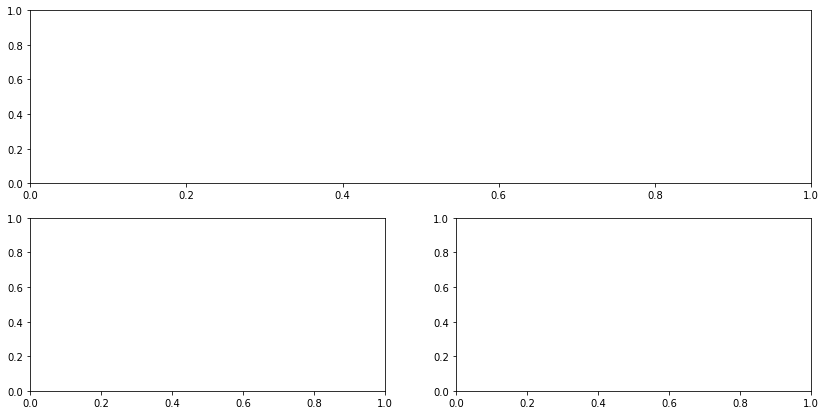

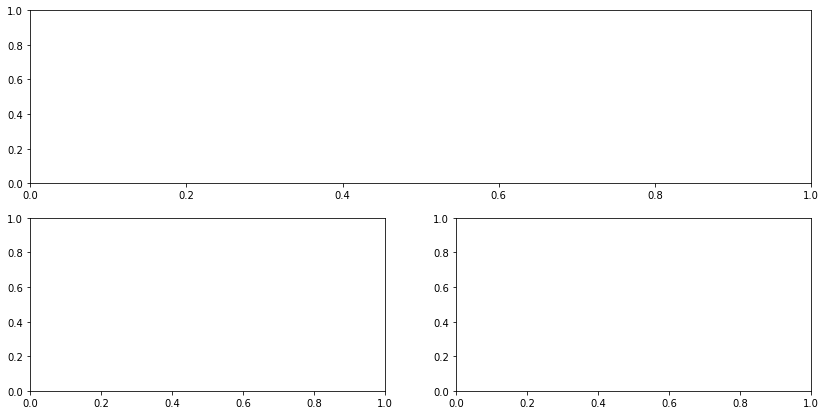

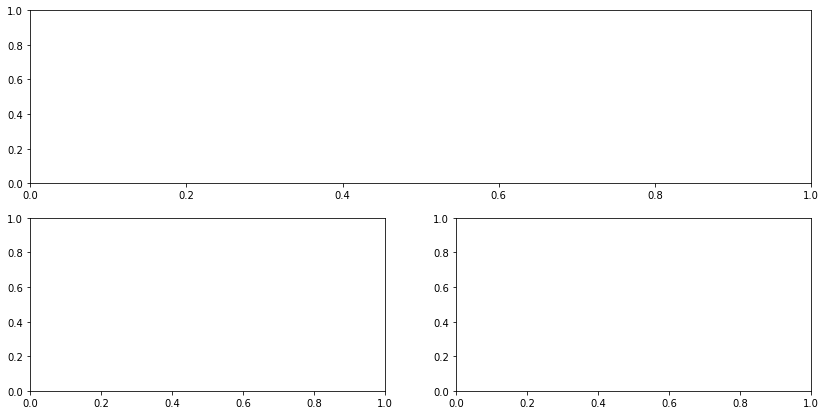

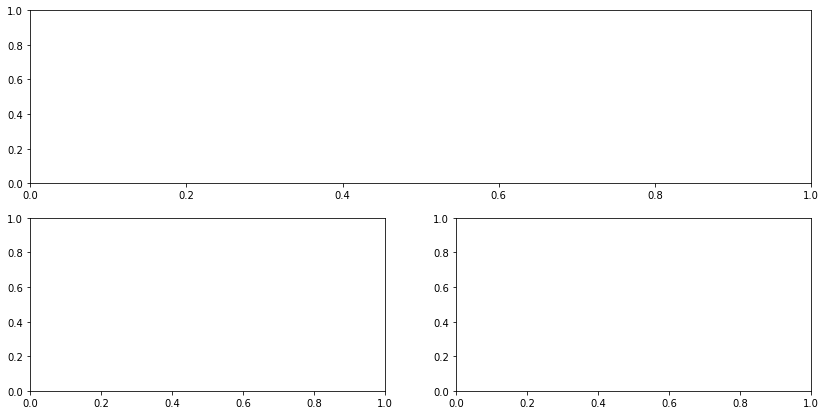

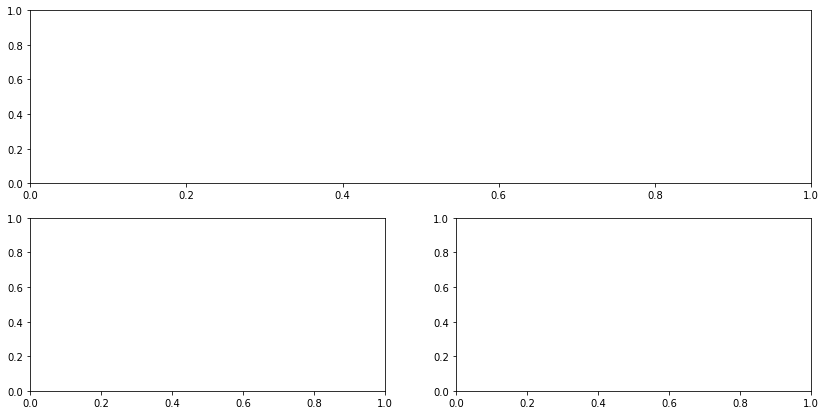

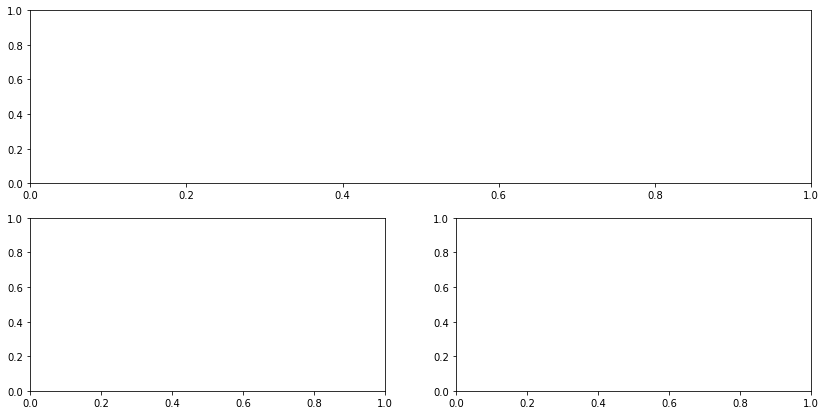

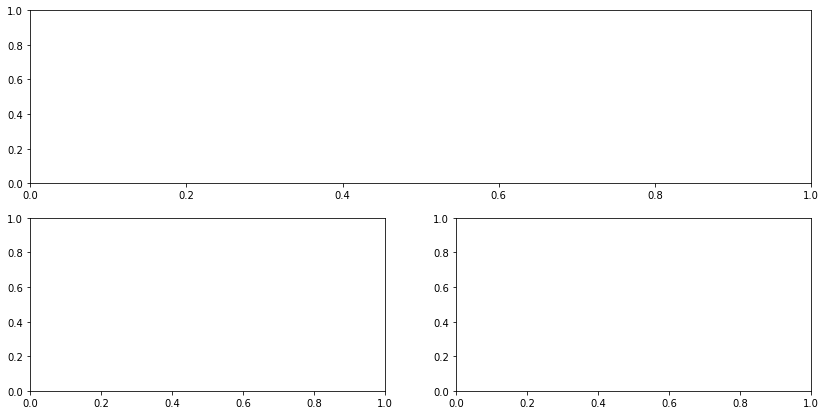

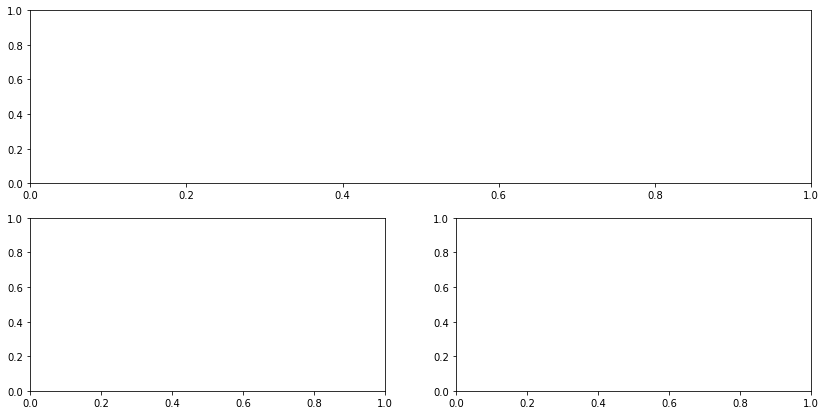

In [293]:

## Funcion de covarianza
slider_phi = widgets.FloatSlider(
    value = 2.0,
    min = 0.0,
    max = 100.0,
    step=2.0,
    description='$\\phi$:',
    continuous_update=False,
)

slider_periodo = widgets.FloatSlider(
    value = 17.0,
    min = 0,
    max = 100,
    step=0.1,
    description='$p$:',
    continuous_update=False,

)

slider_sigma = widgets.FloatSlider(
    value = 1.0,
    min = 0.01,
    max = 2.0,
    step=0.1,
    description='$sigma$:',
    continuous_update=False,
)

slider_nugget = widgets.FloatSlider(
    value = 0.1,
    min = 0.0,
    max = 5.0,
    step=0.1,
    description='nugget',
    continuous_update=False,
)



@widgets.interact(phi=slider_phi,periodo=slider_periodo,sigma_2=slider_sigma,nugget=slider_nugget)
def pintaCorrfunc(phi,periodo,sigma_2,nugget):
    """
    Dibuja la función de correlación dado un valor de phi
    """
    #fig = Figure() 
    #ax = fig.add_subplot()
    #phi = obj.value()
    d = D[0,:]
    plt.title("Correlación de potencia exponencial")

    ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((2, 2), (1, 0), rowspan=2)
    ax3 = plt.subplot2grid((2, 2), (1, 1), rowspan=2)
    data = simulateGPPeriodic1D(D,phi,periodo,sigma_2=sigma_2,nugget=nugget)
    ## El proceso gaussiano
    ax1.scatter(d,data['simulacion'])
    ax1.plot(d,data['simulacion'])
    ## Normal varianza constante, independiente  e identicamente distribuido
    ax1.scatter(d,data['normal_iid'],alpha=0.6,color='orange')
    labels = ['Proceso Gaussiano','Normal iid']
    ax1.legend(labels=labels,loc="upper right")
    ax1.set_title("Realizaciones del  proceso gaussiano")
    ax1.set_xlabel("Distancia")
    
    ## Función de correlación
    CovMat = data['CovMat']
    ax2.plot(d,CovMat[0,:])
    ax2.set_title("Función de covarianza")
    ax2.set_xlabel("Distancia")
    labels_c = ['$\\phi$ : %s \nperiodo: %s'%(phi,periodo)]
    ax2.legend(labels=labels_c,loc="upper right")

    ## Muestra matriz de correlación
    ax3.imshow(CovMat)
    ax3.set_title("Matríz de covarianza")
    #ax3.colorbar()
    #ax3.plot(,correlación_de_potencia_exponencial(d,phi=phi,kappa=kappa))
    plt.suptitle("Covarianza periódica con periodo %s"%periodo,fontsize=20)
    #print('The value is {}'.format(obj.description))
    #return(p)

## Definiendo funciones de covarianza con una *API* para procesos gausianos

En esta sección utilizaremos una biblioteca de Python llamada *PyMC* que implementa un lenguaje de programación probabilístico para definir y especificar modelos estocásticos bayesianos. La biblioteca incluye una interfaz de programación para aplicaciones (API, por sus siglas en inglés) y una gramática para definir variables aleotorias y operaciónes algebráicas con el fin de especificar múltiples familias de procesos estocásticos. La biblioteca interpreta la especificación (en adelante llamado *modelo*) y genera una implementación en un lenguaje de bajo nivel (C++) especialmente optimizado para análisis numérico, por ejemplo, usando diferenciación automática y configuraciones especificas de hardware durante la compilación.  

La biblioteca genera un ejecutable optimizado que muestrea la distribución posterior al modelo especificado usando diferentes métodos de muestreo basados en métodologías Monte Carlo y Cadenas de Markov (MCMC, por sus siglas en inglés). En particular, PyMC utiliza el método Monte Carlo Hamiltoniano (HMC), que ha probado ser más rápido que los métodos tradicionales como Metropolis-Hastings y el muestreo de Gibbs. 

PyMC incluye un módulo para trabajar con procesos gausianos. En esta sección utilizaremos está biblioteca y las funciones asociadas para generar procesos gausianos y posteriormente para hacer inferencia sobre estos procesos y poder evaluar su precisión. 

## Generar datos sintéticos (simulados)
Primero importamos las bibliotecas

In [207]:
import pymc3 as pm
import theano.tensor as tt

In [305]:
## Definimos el número de observaciones (n)
n = 100
## Las observaciones van a estar distribuidas en una variable (e.g. tiempo). 
## Vamos a generar los puntos distribuidos del 0 (e.g tiempo cero, a 1000 (tiempo 1000))
X = np.linspace(0, 1000, n)[:,None]

# Especificamos la función de covarianza. En este caso será una exponencial cuadrada
# con parámetro $\phi$ 50. 

#### Mapear nombres de parámetros (griego) con los del modulo.
cov_func = pm.gp.cov.ExpQuad(1, ls=50)
# Para hacer el ejemplo simple usamos una media de cero. 
mean_func = pm.gp.mean.Zero()



La función de covarianza está definida en el objeto 'cov_func'. Para poder instanciar el objeto (i.e. darle valores numéricos) debemos llamar el método 'eval()'. De esta manere, graficar los valores de la matríz de covarianza se puede hacer con la siguiente sentencia:

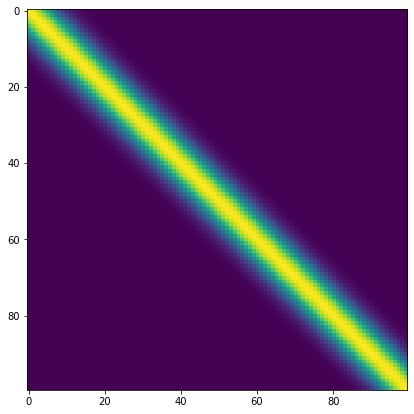

In [306]:
plt.imshow(cov_func(X).eval())

## Hacer una realización del proceso
Como en los ejemplos anteriores, para generar una realización de proceso gausiano basta con instanciar una realización de una función de distribución normal multivariada con la matríz de covarianza obtenida anteriormente.
    Para asegurar que la matríz sea positiva definida le sumamos un valor chiquitito en la diagonal (i.e. 1e-8 * np.eye(n)).

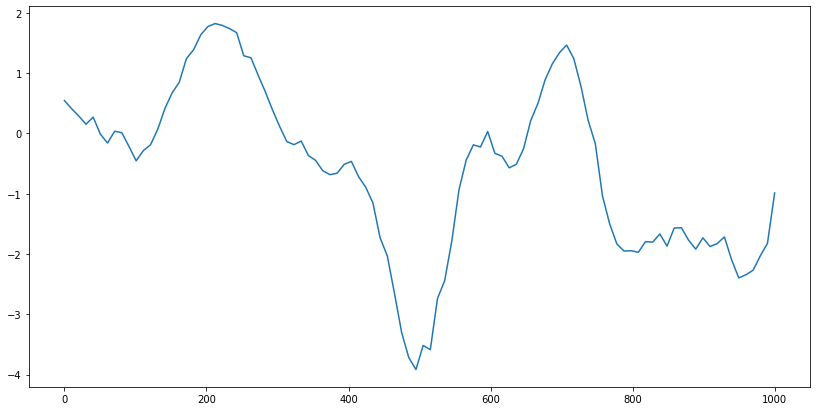

In [313]:
f_true = np.random.multivariate_normal(
    mean_func(X).eval(), cov_func(X).eval() + 1e-8 * np.eye(n), 1
    ).flatten()

sigma = 0.1
y = f_true + np.random.normal(0,sigma, size=n)

plt.plot(X,y)

# Inferencia
Vamos a hacer la inferencia usando 'PyMC', un lenguaje de programación probabilistico basado en Python.  

In [314]:
## Inicializamos un contexto llamado model
with pm.Model() as model:
    
    # Podemos definir las distribuciones 'a priori'.
    # En este caso necesitamos uno para phi.
    phi = pm.Uniform('phi',0,100)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # Instanciar la función de covarianza
    ## El primer elemento es la dimensionalidad del proceso. En este caso es solo una dimensión.
    cov = pm.gp.cov.ExpQuad(1,phi)
    
    gp = pm.gp.Latent(cov_func=cov)
    
    ## Instancia la matriz de covarianza dado el espacio donde se midieron las distancias. 
    f = gp.prior("f",X)
    
    y_ = pm.Normal("y",mu=f,sigma=sigma,observed=y)
    
    ## Usando el método MCMC
    trace_hm = pm.sample(500,chains=2,return_inferencedata=True)
    
    ## Usando métodos de aproximación variacionales
    #trace_advi = pm.fit(method="advi")
    ## Version alternativa
    #gp = pm.gp.Marginal(cov_func=cov)
    #ml_hm = gp.marginal_likelihood('ml_hm',y=y,X=X,noise=sigma)
    #y_obs = pm.gp.Latent('y_obs',cov_func=f_cov,sigma=s2_n,observed=data['simulacion'])    
    



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [f_rotated_, sigma, phi]


ValueError: Not enough samples to build a trace.

In [ ]:
import arviz as az

array([[<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'phi'}>,
        <AxesSubplot:title={'center':'phi'}>]], dtype=object)

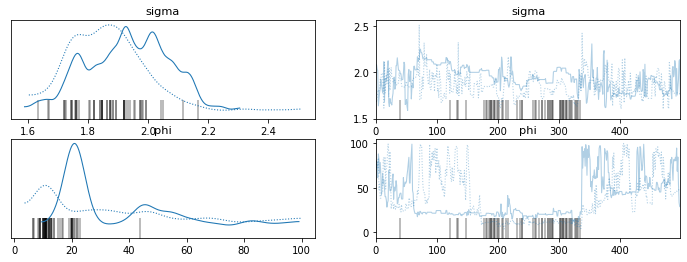

In [312]:
az.plot_trace(trace_hm,var_names=['sigma','phi']) 

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda/envs/biospytial3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'sigma'}>,
       <AxesSubplot:title={'center':'phi'}>], dtype=object)

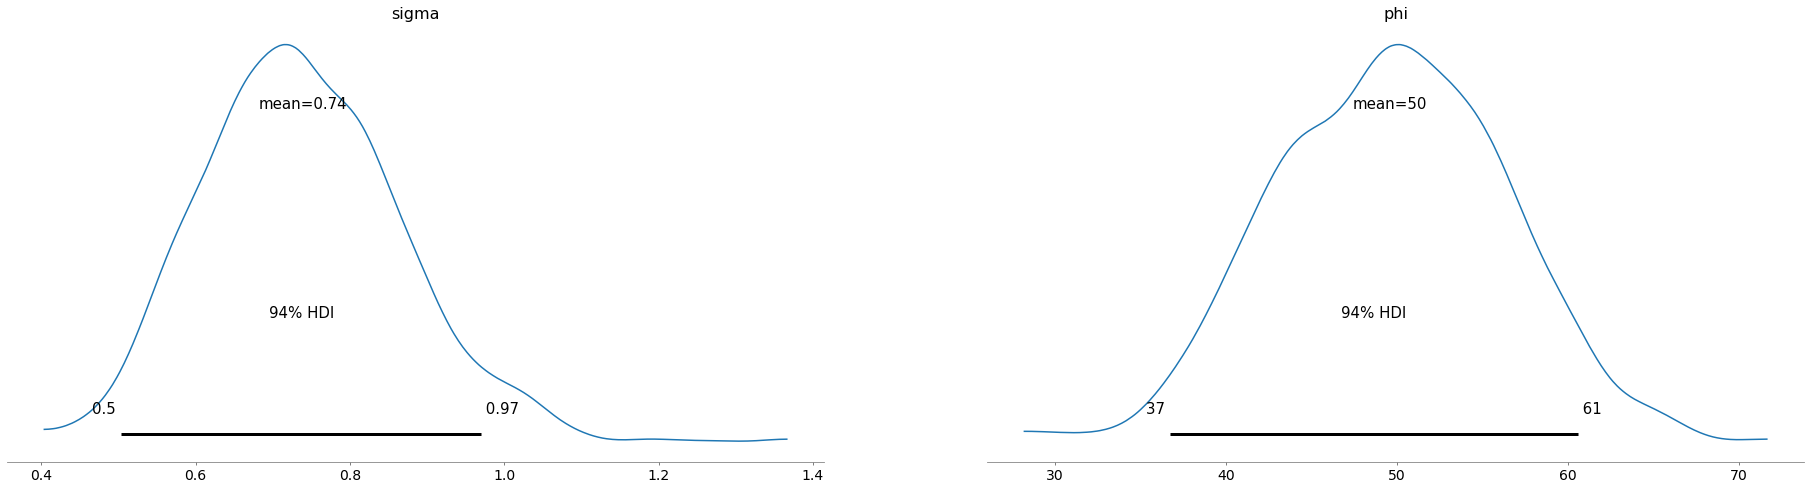

In [242]:
# Using Variational approximation
#az.plot_posterior(trace_advi.sample(1000),var_names=['sigma','phi'])

## Combinar varias funciones de covarianza
Las funciones de covarianza son cerradas (algebráicamente) con la suma y la multiplicación. Aquí tenemos un ejemplo donde usamos una combinación entre una covarianza periódica y una de exponencial cuadrada.
>> Referencias

In [326]:
# The latent function values are one sample from a multivariate normal
# Note that we have to call `eval()` because PyMC3 built on top of Theano

##Try simulation with tutorial
# A one dimensional column vector of inputs.
n = 200
X = np.linspace(0, 1000, n)[:,None]
# Specify the covariance function.
period = 50
phi_periodic = 3
phi = 50
nugget = 0.1

cov_func_1 = pm.gp.cov.ExpQuad(1, ls=phi)
cov_func_2 = pm.gp.cov.Periodic(1,period,phi_periodic)
cov_nugget = pm.gp.cov.WhiteNoise(nugget)

cov_func = (nugget * cov_func_1) + cov_func_2
#cov_func = (cov_func_1) + cov_func_2

#cov_func = cov_func_2
mean_func = pm.gp.mean.Zero()


f_true = np.random.multivariate_normal(
    mean_func(X).eval(), cov_func(X).eval() + 1e-8 * np.eye(n), 1
    ).flatten()

sigma = 0.1
y = f_true + np.random.normal(0,sigma, size=n)

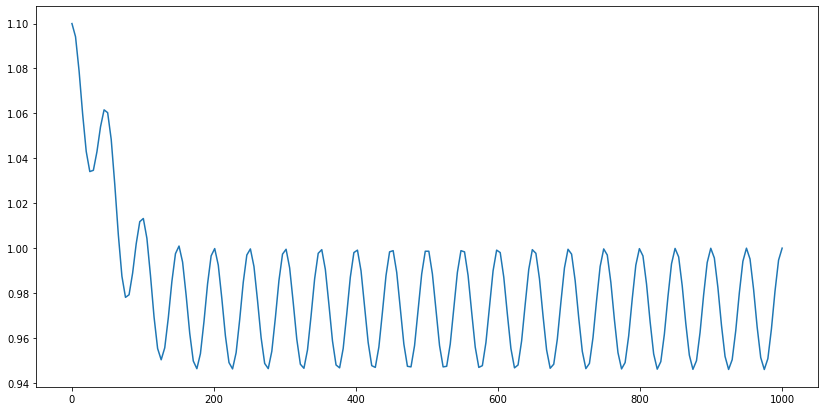

In [327]:
plt.plot(X[:,0],cov_func(X).eval()[:,0])

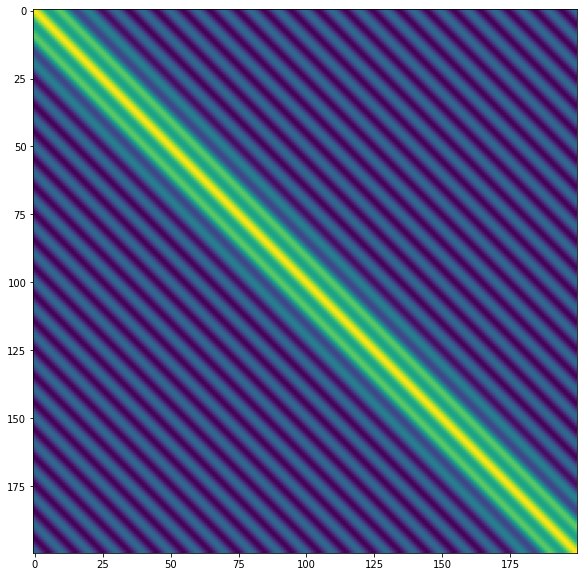

In [330]:
plt.imshow(cov_func(X).eval())

## Explicar como funcionan los dos tipos de parámetros de escala, uno "global" y otro local (periódico).

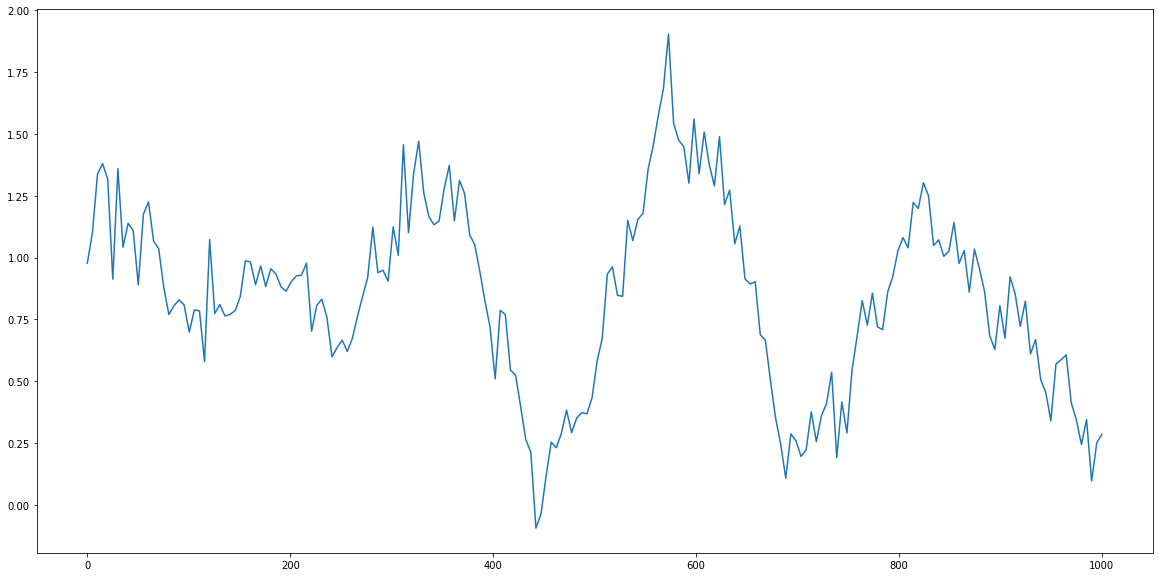

In [331]:
plt.plot(X,y)

In [291]:

with pm.Model() as model_period:
    phi = pm.Uniform('phi',0,100)
    phi_period = pm.Uniform('phi_period',0,100)
    
    period = pm.HalfNormal('period',sigma=100)
    #tau = pm.Normal('tau',mu=0,sigma=2)
    ## Prior para la varianza general, primero en escala log.
    #log_s2_f = pm.Uniform('log_s2_f',lower=-10,upper=5)
    ## Luego en forma deterministica
    #s2_f = pm.Deterministic('s2_f',tt.exp(log_s2_f))

    
    # función de covarianza
    cov_1 = pm.gp.cov.ExpQuad(1,ls=phi)
    cov_2 = pm.gp.cov.Periodic(1,period,ls=phi_period)
    cov = (cov_func_1) + cov_func_2

    
    
    #nugg = pm.gp.cov.WhiteNoise(tau)
    #cov = (nugg * cov_func_1) + cov_func_2
    #cov_func = cov_func_2
    #mean_func = pm.gp.mean.Zero()    
    #gp = pm.gp.Latent(cov_func=cov)
    #f = gp.prior("f",X)
    gp = pm.gp.Marginal(cov_func=cov)
    
    
    sigma = pm.HalfNormal("σ", sigma=1)

    #y_ = pm.Normal("y_obs",mu=f,sigma=sigma,observed=y)
    ml_hm = gp.marginal_likelihood('ml_hm',y=y,X=X,noise=sigma)
    trace_hm = pm.sample(1000,return_inferencedata=True)
    #y_obs = pm.gp.Latent('y_obs',cov_func=f_cov,sigma=s2_n,observed=data['simulacion'])    
    


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, period, phi_period, phi]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 324 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


array([[<AxesSubplot:title={'center':'phi'}>,
        <AxesSubplot:title={'center':'phi'}>],
       [<AxesSubplot:title={'center':'phi_period'}>,
        <AxesSubplot:title={'center':'phi_period'}>],
       [<AxesSubplot:title={'center':'period'}>,
        <AxesSubplot:title={'center':'period'}>]], dtype=object)

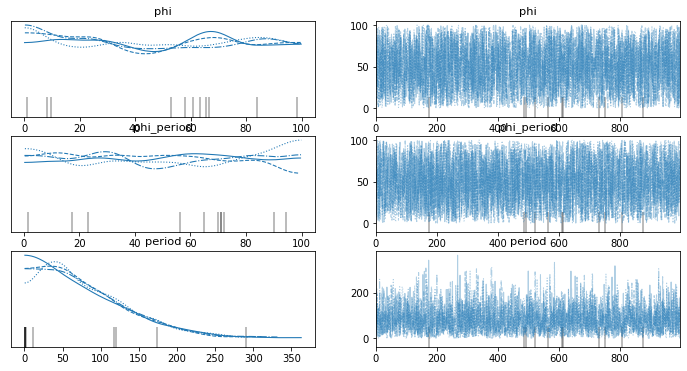

In [292]:
az.plot_trace(trace_hm,var_names=['phi','phi_period','period']) 

In [ ]:
Media que varia con tiempo, lineal, periodico, polynomial.
Después espacial. 
y ya .. 

<ErrorbarContainer object of 3 artists>

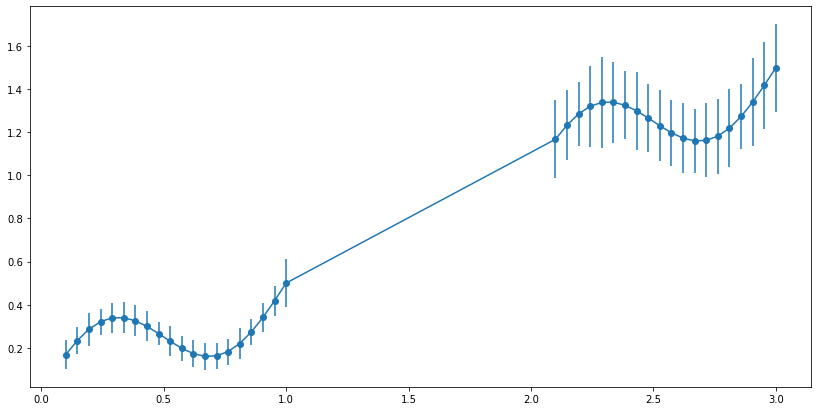

In [26]:


SEED = 2020
rng = np.random.default_rng(SEED)
#az.style.use("arviz-darkgrid")



def signal(x):
    return x / 2 + np.sin(2 * np.pi * x) / 5


def noise(y):
    return np.exp(y) / 20


X = np.linspace(0.1, 1, 20)[:, None]
X = np.vstack([X, X + 2])
X_ = X.flatten()
y = signal(X_)
σ_fun = noise(y)

y_err = rng.lognormal(np.log(σ_fun), 0.1)
y_obs = rng.normal(y, y_err, size=(5, len(y)))
y_obs_ = y_obs.T.flatten()
X_obs = np.tile(X.T, (5, 1)).T.reshape(-1, 1)
X_obs_ = X_obs.flatten()
idx = np.tile(np.array([i for i, _ in enumerate(X_)]), (5, 1)).T.flatten()

Xnew = np.linspace(-0.15, 3.25, 100)[:, None]
Xnew_ = Xnew.flatten()
ynew = signal(Xnew)

plt.plot(X, y, "C0o")
plt.errorbar(X_, y, y_err, color="C0")


In [37]:
X.shape

(40, 1)

In [39]:
D[:,1]

(200,)

In [31]:
data['simulacion']

(200,)

In [42]:

from scipy.spatial.distance import pdist
def get_ℓ_prior(points):
    """Calculates mean and sd for InverseGamma prior on lengthscale"""
    distances = pdist(points[:, None])
    distinct = distances != 0
    ℓ_l = distances[distinct].min() if sum(distinct) > 0 else 0.1
    ℓ_u = distances[distinct].max() if sum(distinct) > 0 else 1
    ℓ_σ = max(0.1, (ℓ_u - ℓ_l) / 6)
    ℓ_μ = ℓ_l + 3 * ℓ_σ
    return ℓ_μ, ℓ_σ


ℓ_μ, ℓ_σ = [stat for stat in get_ℓ_prior(X_)]

In [56]:
def plot_inducing_points(ax):
    yl = ax.get_ylim()
    yu = -np.subtract(*yl) * 0.025 + yl[0]
    ax.plot(Xu, np.full(Xu.shape, yu), "xk", label="Inducing Points")
    ax.legend(loc="upper left")


def get_quantiles(samples, quantiles=[2.5, 50, 97.5]):
    return [np.percentile(samples, p, axis=0) for p in quantiles]


def plot_mean(ax, mean_samples):
    """Plots the median and 95% CI from samples of the mean

    Note that, although each individual GP exhibits a normal distribution at each point
    (by definition), we are sampling from a mixture of GPs defined by the posteriors of
    our hyperparameters. As such, we use percentiles rather than mean +/- stdev to
    represent the spread of predictions from our models.
    """
    l, m, u = get_quantiles(mean_samples)
    ax.plot(Xnew, m, "C0", label="Median")
    ax.fill_between(Xnew_, l, u, facecolor="C0", alpha=0.5, label="95% CI")

    ax.plot(Xnew, ynew, "--k", label="Mean Function")
    ax.plot(X, y, "C1.", label="Observed Means")
    ax.set_title("Mean Behavior")
    ax.legend(loc="upper left")


def plot_var(ax, var_samples):
    """Plots the median and 95% CI from samples of the variance"""
    if var_samples.squeeze().ndim == 1:
        ax.plot(Xnew, var_samples, "C0", label="Median")
    else:
        l, m, u = get_quantiles(var_samples)
        ax.plot(Xnew, m, "C0", label="Median")
        ax.fill_between(Xnew.flatten(), l, u, facecolor="C0", alpha=0.5, label="95% CI")
    ax.plot(Xnew, noise(signal(Xnew_)) ** 2, "--k", label="Noise Function")
    ax.plot(X, y_err ** 2, "C1.", label="Observed Variance")
    ax.set_title("Variance Behavior")
    ax.legend(loc="upper left")


def plot_total(ax, mean_samples, var_samples=None, bootstrap=True, n_boots=100):
    """Plots the overall mean and variance of the aggregate system

    We can represent the overall uncertainty via explicitly sampling the underlying normal
    distributrions (with `bootstrap=True`) or as the mean +/- the standard deviation from
    the Law of Total Variance. For systems with many observations, there will likely be
    little difference, but in cases with few observations and informative priors, plotting
    the percentiles will likely give a more accurate representation.
    """

    if (var_samples is None) or (var_samples.squeeze().ndim == 1):
        samples = mean_samples
        l, m, u = get_quantiles(samples)
        ax.plot(Xnew, m, "C0", label="Median")
    elif bootstrap:
        # Estimate the aggregate behavior using samples from each normal distribution in the posterior
        samples = (
            rng.normal(
                mean_samples.T[:, :, None],
                np.sqrt(var_samples).T[:, :, None],
                (*mean_samples.T.shape, n_boots),
            )
            .reshape(len(Xnew_), -1)
            .T
        )
        l, m, u = get_quantiles(samples)
        ax.plot(Xnew, m, "C0", label="Median")
    else:
        m = mean_samples.mean(axis=0)
        ax.plot(Xnew, m, "C0", label="Mean")
        sd = np.sqrt(mean_samples.var(axis=0) + var_samples.mean(axis=0))
        l, u = m - 2 * sd, m + 2 * sd

    ax.fill_between(Xnew.flatten(), l, u, facecolor="C0", alpha=0.5, label="Total 95% CI")

    ax.plot(Xnew, ynew, "--k", label="Mean Function")
    ax.plot(X_obs, y_obs_, "C1.", label="Observations")
    ax.set_title("Aggregate Behavior")
    ax.legend(loc="upper left")

In [43]:
with pm.Model() as model_hm:
    ℓ = pm.InverseGamma("ℓ", mu=ℓ_μ, sigma=ℓ_σ)
    η = pm.Gamma("η", alpha=2, beta=1)
    cov = η ** 2 * pm.gp.cov.ExpQuad(input_dim=1, ls=ℓ)

    gp_hm = pm.gp.Marginal(cov_func=cov)

    σ = pm.Exponential("σ", lam=1)

    ml_hm = gp_hm.marginal_likelihood("ml_hm", X=X_obs, y=y_obs_, noise=σ)

    trace_hm = pm.sample(return_inferencedata=True, random_seed=SEED)

#with model_hm:
#    mu_pred_hm = gp_hm.conditional("mu_pred_hm", Xnew=Xnew)
#    noisy_pred_hm = gp_hm.conditional("noisy_pred_hm", Xnew=Xnew, pred_noise=True)
#    samples_hm = pm.sample_posterior_predictive(trace_hm, var_names=["mu_pred_hm", "noisy_pred_hm"])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, η, ℓ]


ValueError: Not enough samples to build a trace.

In [51]:
X_obs.shape

(200, 1)

In [ ]:

    ml_hm = gp_hm.marginal_likelihood("ml_hm", X=X_obs, y=y_obs_, noise=σ)

    trace_hm = pm.sample(return_inferencedata=True, random_seed=SEED)

## por hacer..

# Función periódica

# Función Matern

# Función Lineal

# Producto de funciones

Componer cosas

# Implementación de la inferencia..
* Definición de verosimilitud
* Funciones a priori
## Predicciones.


# Ejemplo Mauna-Loa